In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
train, test = train_test_split(dataset, test_size = 0.4, stratify = dataset['species'], random_state = 42)

In [7]:

# number of instances in each class in training data
train.groupby('species').size()

species
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64

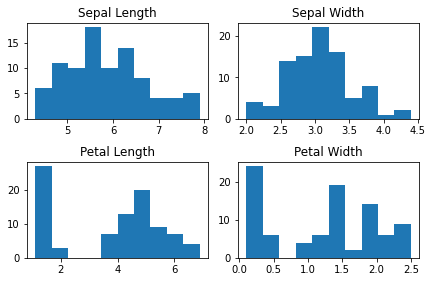

In [8]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

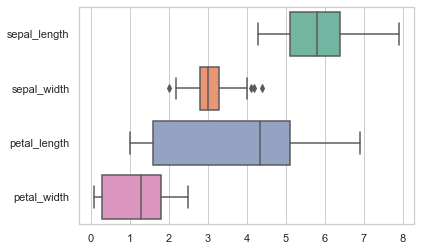

In [27]:
iris = sns.load_dataset("iris")

ax = sns.boxplot(data=iris, orient="h", palette="Set2")

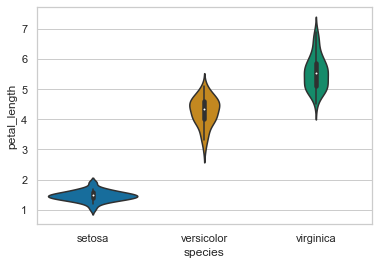

In [29]:

sns.violinplot(x="species", y="petal_length", data=iris, size=5, order = cn, palette = 'colorblind');

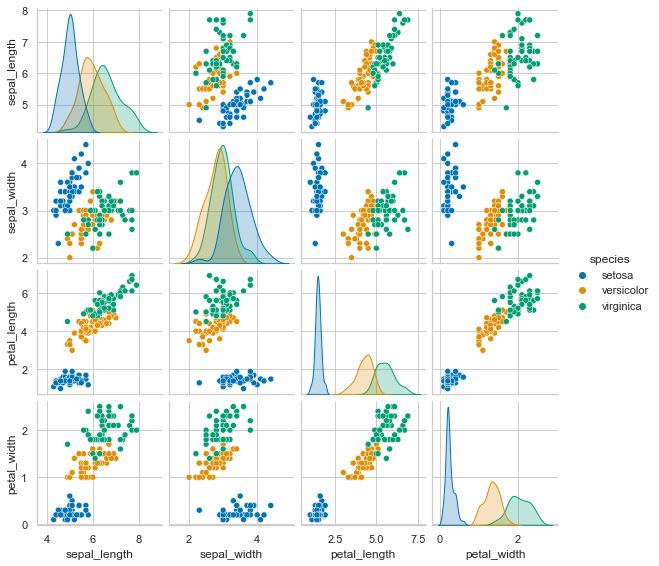

In [30]:
sns.pairplot(iris, hue="species", height = 2, palette = 'colorblind');

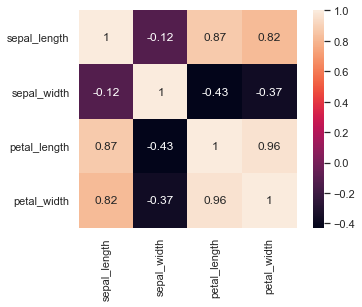

In [31]:
corrmat = iris.corr()
sns.heatmap(corrmat, annot = True, square = True);